# Assignment 3: Clustering and Classification of MEPs' Tweets

## Name: Thomas Saltos

### Set up

In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Preparation

* we keep only the english tweets and drop duplicates.
* A `config.py` file is used to hold twitter api keys.
* The function `get_tweets` return two lists: tweet text and tweet id.
* The dataframe is splited to 108 chunks of length 100 and the last one of length 34 (108x100 + 34 = 10834).
* `tweets_df` is the dataframe of text and id from Twitter API.
* `pd.merge` is used to merge the two dataframes.
* tweets with no text is dropped. 10834 - 10126 = 708 tweets.
* groups `ENL` and `NI` is dropped since it have very few tweets.

In [2]:
csvfile = 'retweets.csv'

df = pd.read_csv(csvfile)
df

,origUserId,origUserScreenName,origMepId,origMepName,origMepGroupId,origMepGroupShort,origMepCountryId,origMepCountryShort,retweetUserId,retweetUserScreenName,...,retweetMepName,retweetMepGroupId,retweetMepGroupShort,retweetMepCountryId,retweetMepCountryShort,origCreatedAt,origTweetId,retweetCreatedAt,retweetTweetId,lang
0,249601317,papadimoulis,28586,Dimitrios PAPADIMOULIS,0,GUE-NGL,11,GRC,33248043,EvaKaili,...,Eva KAILI,1,S&D,11,GRC,Tue Nov 01 12:11:39 +0000 2011,131342637201506304,Sat Jun 27 14:17:28 +0000 2015,614799711309012992,el
1,249601317,papadimoulis,28586,Dimitrios PAPADIMOULIS,0,GUE-NGL,11,GRC,33248043,EvaKaili,...,Eva KAILI,1,S&D,11,GRC,Sun Feb 05 07:45:30 +0000 2012,166064894725206017,Wed Jun 17 12:04:06 +0000 2015,611142270809731072,el
2,217749896,MLP_officiel,28210,Marine LE PEN,7,ENL,9,FRA,498983436,SteeveBriois,...,Steeve BRIOIS,7,ENL,9,FRA,Sun Mar 25 14:47:16 +0000 2012,183928038675849216,Tue Nov 24 09:58:19 +0000 2015,669092676000686080,fr
3,19017675,Nigel_Farage,4525,Nigel FARAGE,6,EFDD,27,GBR,121171051,MargotLJParker,...,Margot PARKER,6,EFDD,27,GBR,Wed Jul 04 11:05:03 +0000 2012,220473289259233285,Sun Dec 07 21:46:00 +0000 2014,541710240014942209,en
4,217749896,MLP_officiel,28210,Marine LE PEN,7,ENL,9,FRA,3065992036,DominiqueBilde,...,Dominique BILDE,7,ENL,9,FRA,Wed May 15 17:43:25 +0000 2013,334725721853407232,Mon May 25 12:36:41 +0000 2015,602815550473904128,fr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26128,85794542,DanHannanMEP,4555,Daniel HANNAN,5,ECR,27,GBR,121171051,MargotLJParker,...,Margot PARKER,6,EFDD,27,GBR,Sun Jan 24 21:19:27 +0000 2016,691369745531158528,Sun Jan 24 21:25:43 +0000 2016,691371326372745216,en
26129,104849271,ramontremosa,97203,Ramon TREMOSA i BALCELLS,3,ALDE,25,ESP,1374827906,markdemesmaeker,...,Mark DEMESMAEKER,5,ECR,1,BEL,Sun Jan 24 21:35:45 +0000 2016,691373849502441477,Mon Jan 25 07:02:31 +0000 2016,691516481591443456,und
26130,472412809,f_philippot,110977,Florian PHILIPPOT,7,ENL,9,FRA,3044857870,Sophie_Montel,...,Sophie MONTEL,7,ENL,9,FRA,Mon Jan 25 07:45:35 +0000 2016,691527317940736000,Mon Jan 25 08:05:09 +0000 2016,691532245195161600,fr
26131,472412809,f_philippot,110977,Florian PHILIPPOT,7,ENL,9,FRA,3329053900,Janice4Brexit,...,Janice ATKINSON,7,ENL,27,GBR,Mon Jan 25 07:45:35 +0000 2016,691527317940736000,Mon Jan 25 08:25:17 +0000 2016,691537311520137216,fr


In [3]:
list(df.columns)

['origUserId',
 'origUserScreenName',
 'origMepId',
 'origMepName',
 'origMepGroupId',
 'origMepGroupShort',
 'origMepCountryId',
 'origMepCountryShort',
 'retweetUserId',
 'retweetUserScreenName',
 'retweetMepId',
 'retweetMepName',
 'retweetMepGroupId',
 'retweetMepGroupShort',
 'retweetMepCountryId',
 'retweetMepCountryShort',
 'origCreatedAt',
 'origTweetId',
 'retweetCreatedAt',
 'retweetTweetId',
 'lang']

In [4]:
df['lang'] = df['lang'].astype(str)
en_df = df[df['lang']=='en']
en_df = en_df.drop_duplicates(subset=["origTweetId"])
en_df

,origUserId,origUserScreenName,origMepId,origMepName,origMepGroupId,origMepGroupShort,origMepCountryId,origMepCountryShort,retweetUserId,retweetUserScreenName,...,retweetMepName,retweetMepGroupId,retweetMepGroupShort,retweetMepCountryId,retweetMepCountryShort,origCreatedAt,origTweetId,retweetCreatedAt,retweetTweetId,lang
3,19017675,Nigel_Farage,4525,Nigel FARAGE,6,EFDD,27,GBR,121171051,MargotLJParker,...,Margot PARKER,6,EFDD,27,GBR,Wed Jul 04 11:05:03 +0000 2012,220473289259233285,Sun Dec 07 21:46:00 +0000 2014,541710240014942209,en
5,17675072,MartinSchulz,1911,Martin SCHULZ,1,S&D,10,DEU,1668992125,NathanGillMEP,...,Nathan GILL,6,EFDD,27,GBR,Fri Jul 05 08:00:23 +0000 2013,353060776707235841,Thu Jun 18 08:52:51 +0000 2015,611456527409524736,en
11,17675072,MartinSchulz,1911,Martin SCHULZ,1,S&D,10,DEU,21648649,maritaulvskog,...,Marita ULVSKOG,1,S&D,26,SWE,Sat May 17 12:47:17 +0000 2014,467647542378123264,Wed Sep 16 09:15:06 +0000 2015,644077036022165504,en
12,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,121171051,MargotLJParker,...,Margot PARKER,6,EFDD,27,GBR,Wed May 28 16:47:44 +0000 2014,471694322472353793,Thu Dec 04 22:21:10 +0000 2014,540631925145493504,en
14,252491320,juliegirling,96956,Julie GIRLING,5,ECR,27,GBR,1300328653,IanDuncanMEP,...,Ian DUNCAN,5,ECR,27,GBR,Tue Jul 08 13:56:43 +0000 2014,486509184708792320,Thu Nov 13 13:17:23 +0000 2014,532884934734909440,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26117,829060856,TheresaMEP,124961,Theresa GRIFFIN,1,S&D,27,GBR,1354570123,julie4nw,...,Julie WARD,1,S&D,27,GBR,Sun Jan 24 14:04:13 +0000 2016,691260217288454144,Sun Jan 24 14:54:31 +0000 2016,691272874393485314,en
26118,829060856,TheresaMEP,124961,Theresa GRIFFIN,1,S&D,27,GBR,202610289,akhanmep,...,Afzal KHAN,1,S&D,27,GBR,Sun Jan 24 14:12:29 +0000 2016,691262296396599296,Sun Jan 24 14:21:13 +0000 2016,691264493725335552,en
26121,202610289,akhanmep,124962,Afzal KHAN,1,S&D,27,GBR,829060856,TheresaMEP,...,Theresa GRIFFIN,1,S&D,27,GBR,Sun Jan 24 14:39:12 +0000 2016,691269020667002880,Sun Jan 24 14:40:33 +0000 2016,691269361059893249,en
26126,202610289,akhanmep,124962,Afzal KHAN,1,S&D,27,GBR,829060856,TheresaMEP,...,Theresa GRIFFIN,1,S&D,27,GBR,Sun Jan 24 17:19:25 +0000 2016,691309340691660800,Sun Jan 24 17:24:28 +0000 2016,691310613272883200,en


In [5]:
import tweepy

from twitter_config import config

auth = tweepy.OAuthHandler(config['consumer_key'], config['consumer_secret'])
auth.set_access_token(config['access_token'], config['access_token_secret'])

api = tweepy.API(auth)

In [6]:
def get_tweets(id_list):
    """Get tweets from a list of ids"""
    tweet_txt = []
    tweet_ids = []
    tweets = api.statuses_lookup(id_list, map_=True) # id_list is the list of tweet ids
    for i in tweets:
        try:
            tweet_txt.append(i.text)
            tweet_ids.append(i.id)
        except Exception as e:
            tweet_txt.append('None')
            tweet_ids.append(i.id)
    return (tweet_txt, tweet_ids)
    

In [7]:
n = 100  #chunk row size
list_df = [en_df[i:i+n].origTweetId for i in range(0,en_df.shape[0],n)]
len(list_df)

109

In [8]:
tweets = []
tweets_ids = []
for l in list_df:
    ids = np.array(l).tolist()
    ttext, tids = get_tweets(ids)
    tweets.append(ttext)
    tweets_ids.append(tids)
len(tweets)

109

In [9]:
len(tweets[108])

34

In [10]:
tweets_list = [item for sublist in tweets for item in sublist]
tweets_ids_list = [item for sublist in tweets_ids for item in sublist]
len(tweets_list)

10834

In [11]:
# dictionary of lists tweet text and id 
dict = {'text': tweets_list, 'id': tweets_ids_list}  
tweets_df = pd.DataFrame(dict) 
tweets_df.head(10)

,text,id
0,Lord Hill's written answers to EP are now on m...,519050739642286080
1,Our @SebDance asks @ABratusek about global cli...,519139901359783936
2,.@Ansip_EU agrees with @JanAlbrecht that #open...,519192343069872128
3,None,519029490685841408
4,New:Child abuse scandal Manchester area - wors...,519172557900365824
5,I write for @LabourList Tory threat to Court o...,518024241024073728
6,"“@Ashleyfoxmep: and named her party ""the Allia...",519109106272317440
7,Good luck to @TheProgressives in Bulgaria toda...,518721908951769088
8,As EP does not provide coffee in meetings Comm...,517735072754302976
9,Robert Halfon raising issue of illegal travell...,500600838419935232


In [12]:
full_df = pd.merge(en_df, tweets_df.rename(columns={'id':'origTweetId'}), on='origTweetId',  how='left')
full_df.head(10)

,origUserId,origUserScreenName,origMepId,origMepName,origMepGroupId,origMepGroupShort,origMepCountryId,origMepCountryShort,retweetUserId,retweetUserScreenName,...,retweetMepGroupId,retweetMepGroupShort,retweetMepCountryId,retweetMepCountryShort,origCreatedAt,origTweetId,retweetCreatedAt,retweetTweetId,lang,text
0,19017675,Nigel_Farage,4525,Nigel FARAGE,6,EFDD,27,GBR,121171051,MargotLJParker,...,6,EFDD,27,GBR,Wed Jul 04 11:05:03 +0000 2012,220473289259233285,Sun Dec 07 21:46:00 +0000 2014,541710240014942209,en,Euro Parliament votes overwhelmingly to reject...
1,17675072,MartinSchulz,1911,Martin SCHULZ,1,S&D,10,DEU,1668992125,NathanGillMEP,...,6,EFDD,27,GBR,Fri Jul 05 08:00:23 +0000 2013,353060776707235841,Thu Jun 18 08:52:51 +0000 2015,611456527409524736,en,"US have one currency, one Central Bank and one..."
2,17675072,MartinSchulz,1911,Martin SCHULZ,1,S&D,10,DEU,21648649,maritaulvskog,...,1,S&D,26,SWE,Sat May 17 12:47:17 +0000 2014,467647542378123264,Wed Sep 16 09:15:06 +0000 2015,644077036022165504,en,More jobs for young people is my top priority ...
3,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,121171051,MargotLJParker,...,6,EFDD,27,GBR,Wed May 28 16:47:44 +0000 2014,471694322472353793,Thu Dec 04 22:21:10 +0000 2014,540631925145493504,en,"Vote #Labour, get Tory. Vote Tory, get Labour...."
4,252491320,juliegirling,96956,Julie GIRLING,5,ECR,27,GBR,1300328653,IanDuncanMEP,...,5,ECR,27,GBR,Tue Jul 08 13:56:43 +0000 2014,486509184708792320,Thu Nov 13 13:17:23 +0000 2014,532884934734909440,en,Answering my question in ECR Group J-C Juncker...
5,158021529,oflynnmep,124940,Patrick O'FLYNN,6,EFDD,27,GBR,108882900,RogerHelmerMEP,...,6,EFDD,27,GBR,Sat Aug 16 11:11:55 +0000 2014,500600838419935232,Mon Nov 23 10:08:57 +0000 2015,668732964516294656,en,Robert Halfon raising issue of illegal travell...
6,209020126,paulnuttallukip,96805,Paul NUTTALL,6,EFDD,27,GBR,3242161976,LouiseBoursUKIP,...,6,EFDD,27,GBR,Fri Sep 12 10:52:06 +0000 2014,510380324636073984,Thu Jun 11 11:14:51 +0000 2015,608955548017369088,en,None
7,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,952267464,JamesJimCarver,...,6,EFDD,27,GBR,Wed Sep 17 15:10:28 +0000 2014,512257283087429632,Wed Dec 17 23:05:07 +0000 2014,545354031577980928,en,"Ignore the Labour lies, this is where #UKIP st..."
8,454779231,catherinemep,96955,Catherine BEARDER,3,ALDE,27,GBR,351009963,DavidCoburnUKip,...,6,EFDD,27,GBR,Thu Sep 25 09:56:24 +0000 2014,515077347645870080,Sat Oct 04 12:26:40 +0000 2014,518376655963033600,en,Next week I'll be grilling EU Commissioner can...
9,478679663,Steven_Woolfe,124966,Steven WOOLFE,6,EFDD,27,GBR,158021529,oflynnmep,...,6,EFDD,27,GBR,Tue Sep 30 12:11:36 +0000 2014,516923314225553409,Tue Oct 07 14:45:26 +0000 2014,519498741850836993,en,#Migration can be positive for the UK - only i...


In [13]:
full_df = full_df.replace(to_replace='None', value=np.nan).dropna()
full_df

,origUserId,origUserScreenName,origMepId,origMepName,origMepGroupId,origMepGroupShort,origMepCountryId,origMepCountryShort,retweetUserId,retweetUserScreenName,...,retweetMepGroupId,retweetMepGroupShort,retweetMepCountryId,retweetMepCountryShort,origCreatedAt,origTweetId,retweetCreatedAt,retweetTweetId,lang,text
0,19017675,Nigel_Farage,4525,Nigel FARAGE,6,EFDD,27,GBR,121171051,MargotLJParker,...,6,EFDD,27,GBR,Wed Jul 04 11:05:03 +0000 2012,220473289259233285,Sun Dec 07 21:46:00 +0000 2014,541710240014942209,en,Euro Parliament votes overwhelmingly to reject...
1,17675072,MartinSchulz,1911,Martin SCHULZ,1,S&D,10,DEU,1668992125,NathanGillMEP,...,6,EFDD,27,GBR,Fri Jul 05 08:00:23 +0000 2013,353060776707235841,Thu Jun 18 08:52:51 +0000 2015,611456527409524736,en,"US have one currency, one Central Bank and one..."
2,17675072,MartinSchulz,1911,Martin SCHULZ,1,S&D,10,DEU,21648649,maritaulvskog,...,1,S&D,26,SWE,Sat May 17 12:47:17 +0000 2014,467647542378123264,Wed Sep 16 09:15:06 +0000 2015,644077036022165504,en,More jobs for young people is my top priority ...
3,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,121171051,MargotLJParker,...,6,EFDD,27,GBR,Wed May 28 16:47:44 +0000 2014,471694322472353793,Thu Dec 04 22:21:10 +0000 2014,540631925145493504,en,"Vote #Labour, get Tory. Vote Tory, get Labour...."
4,252491320,juliegirling,96956,Julie GIRLING,5,ECR,27,GBR,1300328653,IanDuncanMEP,...,5,ECR,27,GBR,Tue Jul 08 13:56:43 +0000 2014,486509184708792320,Thu Nov 13 13:17:23 +0000 2014,532884934734909440,en,Answering my question in ECR Group J-C Juncker...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10827,856010760,GuyVerhofstadt,97058,Guy VERHOFSTADT,3,ALDE,1,BEL,2288266503,MatthijsvMilt,...,3,ALDE,19,NLD,Sun Jan 24 11:53:01 +0000 2016,691227199647662080,Sun Jan 24 11:53:22 +0000 2016,691227288701116416,en,Time to lock EU leaders in a room to sort #ref...
10828,1485429175,JSaryuszWolski,28297,Jacek SARYUSZ-WOLSKI,4,EPP,20,POL,539156512,ZdzKrasnodebski,...,5,ECR,20,POL,Sun Jan 24 13:17:25 +0000 2016,691248438504210432,Mon Jan 25 08:21:14 +0000 2016,691536290198745088,en,Drastic drop in positive EU perception in Pola...
10829,829060856,TheresaMEP,124961,Theresa GRIFFIN,1,S&D,27,GBR,1354570123,julie4nw,...,1,S&D,27,GBR,Sun Jan 24 14:04:13 +0000 2016,691260217288454144,Sun Jan 24 14:54:31 +0000 2016,691272874393485314,en,I'm with @UKYP North West now in Knowsley - gr...
10830,829060856,TheresaMEP,124961,Theresa GRIFFIN,1,S&D,27,GBR,202610289,akhanmep,...,1,S&D,27,GBR,Sun Jan 24 14:12:29 +0000 2016,691262296396599296,Sun Jan 24 14:21:13 +0000 2016,691264493725335552,en,Listening to some fab ideas from young people ...


In [14]:
groups=full_df.groupby('origMepGroupShort')
groups.size()

origMepGroupShort
ALDE          1457
ECR            966
EFDD          2419
ENL             21
EPP           1638
GUE-NGL        304
Greens-EFA     953
NI               1
S&D           2367
dtype: int64

In [15]:
full_df.drop(groups.get_group('ENL').index, inplace=True)
full_df.drop(groups.get_group('NI').index, inplace=True)
full_df

,origUserId,origUserScreenName,origMepId,origMepName,origMepGroupId,origMepGroupShort,origMepCountryId,origMepCountryShort,retweetUserId,retweetUserScreenName,...,retweetMepGroupId,retweetMepGroupShort,retweetMepCountryId,retweetMepCountryShort,origCreatedAt,origTweetId,retweetCreatedAt,retweetTweetId,lang,text
0,19017675,Nigel_Farage,4525,Nigel FARAGE,6,EFDD,27,GBR,121171051,MargotLJParker,...,6,EFDD,27,GBR,Wed Jul 04 11:05:03 +0000 2012,220473289259233285,Sun Dec 07 21:46:00 +0000 2014,541710240014942209,en,Euro Parliament votes overwhelmingly to reject...
1,17675072,MartinSchulz,1911,Martin SCHULZ,1,S&D,10,DEU,1668992125,NathanGillMEP,...,6,EFDD,27,GBR,Fri Jul 05 08:00:23 +0000 2013,353060776707235841,Thu Jun 18 08:52:51 +0000 2015,611456527409524736,en,"US have one currency, one Central Bank and one..."
2,17675072,MartinSchulz,1911,Martin SCHULZ,1,S&D,10,DEU,21648649,maritaulvskog,...,1,S&D,26,SWE,Sat May 17 12:47:17 +0000 2014,467647542378123264,Wed Sep 16 09:15:06 +0000 2015,644077036022165504,en,More jobs for young people is my top priority ...
3,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,121171051,MargotLJParker,...,6,EFDD,27,GBR,Wed May 28 16:47:44 +0000 2014,471694322472353793,Thu Dec 04 22:21:10 +0000 2014,540631925145493504,en,"Vote #Labour, get Tory. Vote Tory, get Labour...."
4,252491320,juliegirling,96956,Julie GIRLING,5,ECR,27,GBR,1300328653,IanDuncanMEP,...,5,ECR,27,GBR,Tue Jul 08 13:56:43 +0000 2014,486509184708792320,Thu Nov 13 13:17:23 +0000 2014,532884934734909440,en,Answering my question in ECR Group J-C Juncker...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10827,856010760,GuyVerhofstadt,97058,Guy VERHOFSTADT,3,ALDE,1,BEL,2288266503,MatthijsvMilt,...,3,ALDE,19,NLD,Sun Jan 24 11:53:01 +0000 2016,691227199647662080,Sun Jan 24 11:53:22 +0000 2016,691227288701116416,en,Time to lock EU leaders in a room to sort #ref...
10828,1485429175,JSaryuszWolski,28297,Jacek SARYUSZ-WOLSKI,4,EPP,20,POL,539156512,ZdzKrasnodebski,...,5,ECR,20,POL,Sun Jan 24 13:17:25 +0000 2016,691248438504210432,Mon Jan 25 08:21:14 +0000 2016,691536290198745088,en,Drastic drop in positive EU perception in Pola...
10829,829060856,TheresaMEP,124961,Theresa GRIFFIN,1,S&D,27,GBR,1354570123,julie4nw,...,1,S&D,27,GBR,Sun Jan 24 14:04:13 +0000 2016,691260217288454144,Sun Jan 24 14:54:31 +0000 2016,691272874393485314,en,I'm with @UKYP North West now in Knowsley - gr...
10830,829060856,TheresaMEP,124961,Theresa GRIFFIN,1,S&D,27,GBR,202610289,akhanmep,...,1,S&D,27,GBR,Sun Jan 24 14:12:29 +0000 2016,691262296396599296,Sun Jan 24 14:21:13 +0000 2016,691264493725335552,en,Listening to some fab ideas from young people ...


## Clustering

* `CountVectorizer()` is used for the vectorization.
* elbow method and the silhouette score is used to find the best number of clusters.
* `get_top_keywords()` function is used to find the top 10 important feautures in each cluster.

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(strip_accents='unicode',
                                lowercase=True,
                                max_df=0.5, 
                                min_df=10,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                stop_words='english')
counts = tf_vectorizer.fit_transform(full_df['text'])
counts.shape

(10104, 1839)

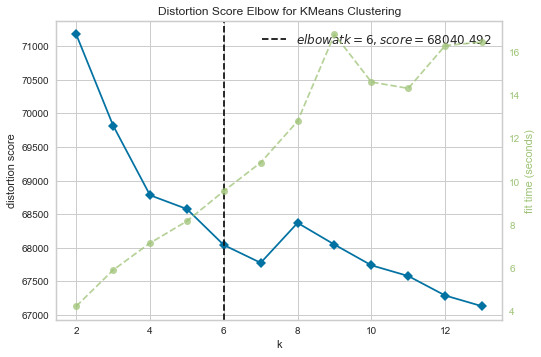

In [35]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(2,14))

visualizer.fit(counts)
visualizer.show()

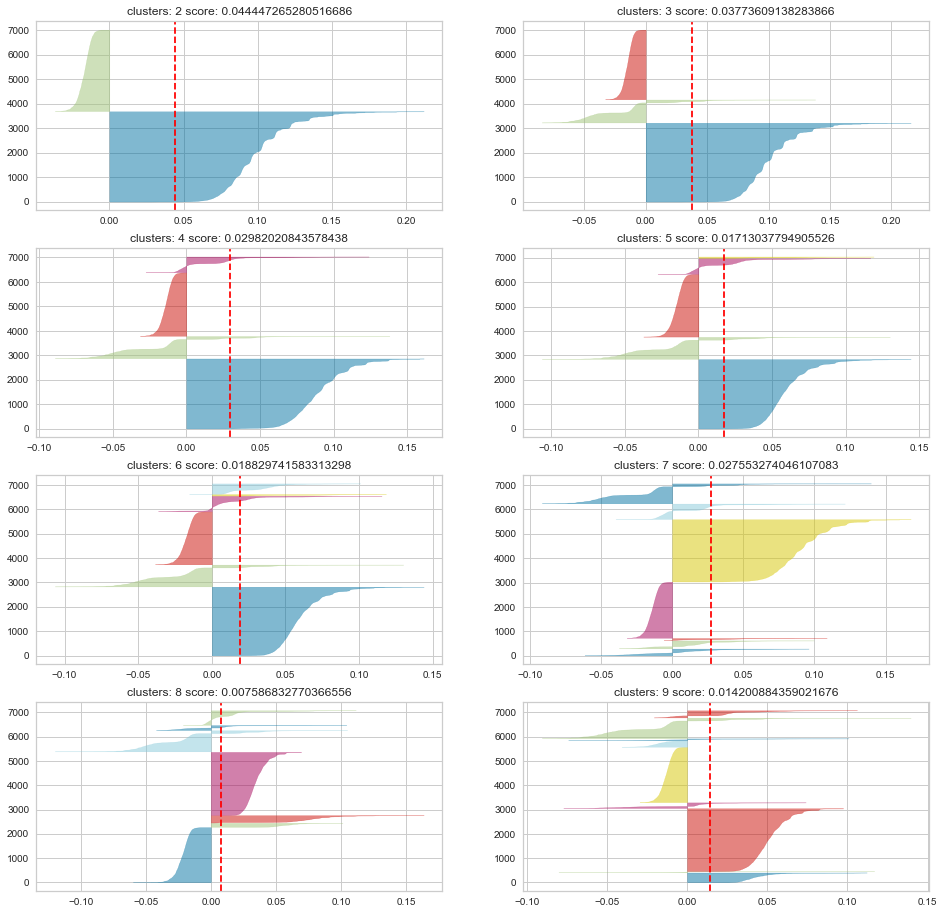

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer

plt.figure(figsize=(4 * 4,  2 * 8))

scores = {}
for n_clusters in range(2, 10):
    plt.subplot(4, 2, n_clusters - 1)
    kmeans = KMeans(n_clusters, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(counts)
    scores[n_clusters] = visualizer.silhouette_score_
    plt.title(f'clusters: {n_clusters} score: {visualizer.silhouette_score_}')

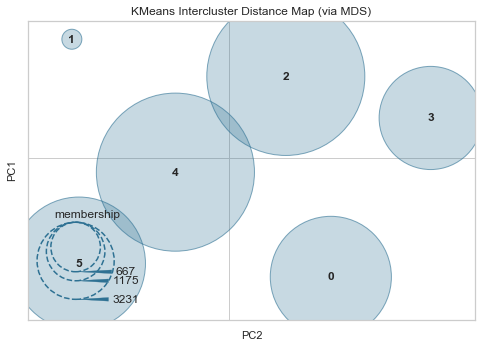

In [37]:
from yellowbrick.cluster import InterclusterDistance

kmeans = KMeans(6)
visualizer = InterclusterDistance(kmeans)

visualizer.fit(counts)   # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [52]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(counts, kmeans.fit_predict(counts), tf_vectorizer.get_feature_names(), 10)


Cluster 0
ttip,support,meeting,labour,great,europe,european,today,ukip,http

Cluster 1
new,just,great,people,eppgroup,european,today,europe,ukip,https

Cluster 2
yes,labour,today,meps,amp,https,ttip,ukip,http,vote

Cluster 3
junckereu,sharing,tax,http,amp,refugees,need,eppgroup,member,states

Cluster 4
need,meeting,meps,europe,today,good,eppgroup,https,http,amp

Cluster 5
eppgroup,ukip,europe,crisis,net,policy,https,amp,http,migration


* The fourth cluster is referred to immigration and the last cluster probable is referred to Greece.

## Classification

* Split dataset in training and testing.
* `MultinomianNB()` and `SGDClassifier()` is used for the classification.

In [39]:
from sklearn.model_selection import train_test_split
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
x = full_df['text']
y = full_df['origMepGroupId']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

print(x_train.shape, y_train.shape)

(7578,) (7578,)


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
text_clf = Pipeline([('vect', CountVectorizer(strip_accents='unicode',
                                            lowercase=True,
                                            max_df=0.5, 
                                            min_df=10,
                                            token_pattern = r'\b[a-zA-Z]{3,}\b',
                                            stop_words='english')),
                     ('clf', MultinomialNB()),
                    ])

In [41]:
from sklearn.model_selection import GridSearchCV

grid_params = {
  'clf__fit_prior': [True, False],
}
clf = GridSearchCV(text_clf, param_grid=grid_params, cv = 5, verbose =1, n_jobs = -1)
clf.fit(x_train, y_train)
print("Best Params: ", clf.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


c:\users\thomas\envs\notebook\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Best Params:  {'clf__fit_prior': True}


In [42]:
mnb_clf = clf.best_estimator_
mnb_clf.fit(x_train, y_train)
predicted = mnb_clf.predict(x_test)
np.mean(predicted == y_test)

0.5728424386381631

In [43]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.57      0.32      0.41        85
           1       0.55      0.59      0.57       583
           2       0.48      0.37      0.42       249
           3       0.47      0.45      0.46       354
           4       0.60      0.60      0.60       414
           5       0.52      0.34      0.41       245
           6       0.66      0.83      0.73       596

    accuracy                           0.57      2526
   macro avg       0.55      0.50      0.51      2526
weighted avg       0.56      0.57      0.56      2526



In [44]:
metrics.confusion_matrix(y_test, predicted)

array([[ 27,  24,   6,   6,   5,   3,  14],
       [  4, 343,  28,  55,  49,  20,  84],
       [  1,  60,  92,  29,  38,   8,  21],
       [  7,  56,  33, 160,  49,  10,  39],
       [  4,  46,  17,  57, 250,  14,  26],
       [  3,  48,   7,  16,  17,  83,  71],
       [  1,  42,   7,  20,  12,  22, 492]], dtype=int64)

In [53]:
from sklearn.linear_model import SGDClassifier

text_clf = Pipeline([('vect', CountVectorizer(strip_accents='unicode',
                                              lowercase=True, 
                                              max_df=0.5, 
                                              min_df=10,
                                              token_pattern = r'\b[a-zA-Z]{3,}\b',
                                              stop_words='english')),
                     ('clf', SGDClassifier(loss='hinge', 
                                           penalty='l2', 
                                           alpha=1e-3, 
                                           random_state=42, 
                                           max_iter=5, 
                                           tol=None)),
                    ])

In [55]:
grid_params = {
    'clf__alpha': (1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3),
    'clf__penalty': ('l1', 'l2'),
    'clf__loss': ('hinge','log')
}

clf = GridSearchCV(text_clf, param_grid=grid_params, cv = 5, verbose =1, n_jobs = -1)
model = clf.fit(x_train, y_train)
print("Best Params: ", clf.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


c:\users\thomas\envs\notebook\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   13.1s finished


Best Params:  {'clf__alpha': 0.001, 'clf__loss': 'hinge', 'clf__penalty': 'l2'}


In [56]:
predicted = model.predict(x_test)
np.mean(predicted == y_test)

0.5601741884402217

In [57]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.55      0.35      0.43        85
           1       0.56      0.60      0.58       583
           2       0.49      0.34      0.40       249
           3       0.46      0.39      0.42       354
           4       0.59      0.61      0.60       414
           5       0.50      0.30      0.37       245
           6       0.62      0.82      0.71       596
           8       0.00      0.00      0.00         0

    accuracy                           0.56      2526
   macro avg       0.47      0.43      0.44      2526
weighted avg       0.55      0.56      0.55      2526



c:\users\thomas\envs\notebook\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
metrics.confusion_matrix(y_test, predicted)

array([[ 30,  23,   7,   6,   6,   5,   7,   1],
       [  6, 350,  26,  36,  35,  19, 107,   4],
       [  4,  53,  85,  28,  38,   9,  29,   3],
       [  8,  65,  26, 138,  59,  10,  47,   1],
       [  3,  46,  20,  49, 251,  13,  31,   1],
       [  0,  44,   9,  23,  21,  73,  75,   0],
       [  4,  49,   2,  23,  12,  17, 488,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

### Dummy Classifier

In [59]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(x_train, y_train)
pred = dummy_clf.predict(x_test)
dummy_clf.score(y_test, pred)

c:\users\thomas\envs\notebook\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


0.18329374505146476

* The Dummy classifier has accuracy 18%.
* The MultinomialNB classifier has accuracy 57%.
* The SGD classifier has accuracy 56%.